In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Dataset
df=pd.read_csv('Fraud_check .csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
# Creating bucket
df['Taxable.Income']=pd.cut(df['Taxable.Income'],bins=[0,30000,99619],labels=['Risky','Good'])

In [8]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [9]:
# LabelEncoding
le=LabelEncoder()
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Taxable.Income']=le.fit_transform(df['Taxable.Income'])
df['Urban']=le.fit_transform(df['Urban'])

In [10]:
# get dummies
df1=pd.get_dummies(df['Marital.Status'])
df2=pd.concat([df,df1],axis=1)
df2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Divorced,Married,Single
0,0,Single,0,50047,10,1,0,0,1
1,1,Divorced,0,134075,18,1,1,0,0
2,0,Married,0,160205,30,1,0,1,0
3,1,Single,0,193264,15,1,0,0,1
4,0,Married,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...,...,...
595,1,Divorced,0,39492,7,1,1,0,0
596,1,Divorced,0,55369,2,1,1,0,0
597,0,Divorced,0,154058,0,1,1,0,0
598,1,Married,0,180083,17,0,0,1,0


In [11]:
df2=pd.concat([df,df1],axis=1)
df2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Divorced,Married,Single
0,0,Single,0,50047,10,1,0,0,1
1,1,Divorced,0,134075,18,1,1,0,0
2,0,Married,0,160205,30,1,0,1,0
3,1,Single,0,193264,15,1,0,0,1
4,0,Married,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...,...,...
595,1,Divorced,0,39492,7,1,1,0,0
596,1,Divorced,0,55369,2,1,1,0,0
597,0,Divorced,0,154058,0,1,1,0,0
598,1,Married,0,180083,17,0,0,1,0


In [12]:
# dropping columns
df2.drop(columns=('Marital.Status'),inplace=True)

In [13]:
x=pd.concat([df2.iloc[:,0],df2.iloc[:,2:8]],axis=1)
y=df2.iloc[:,1]

In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

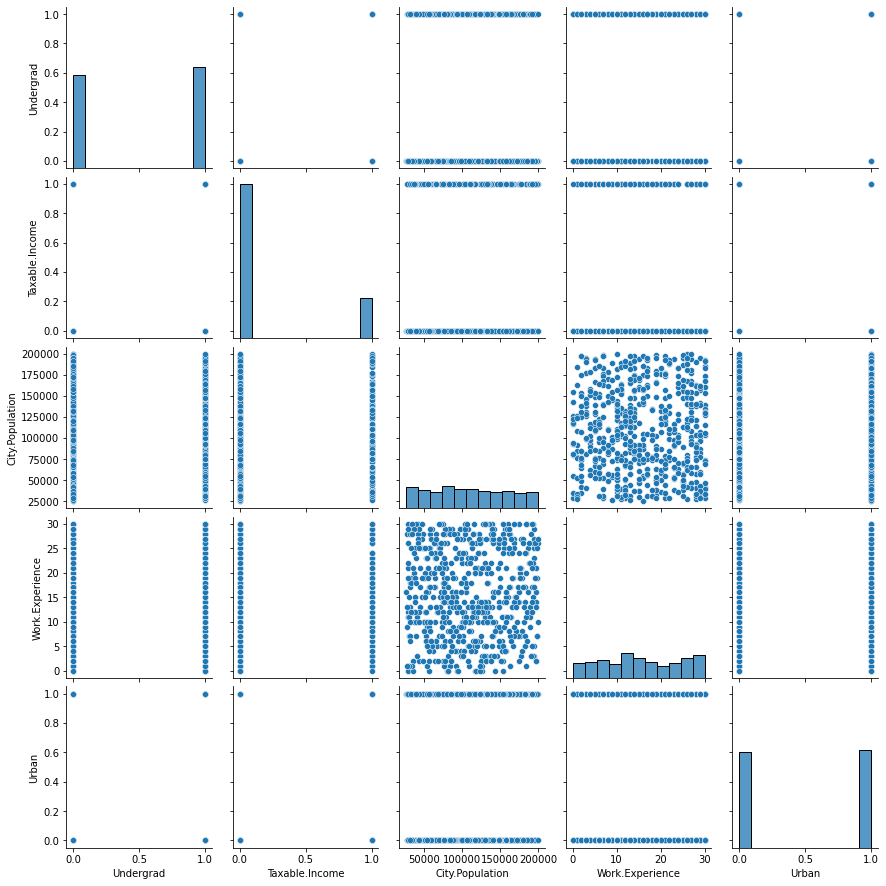

In [15]:
sns.pairplot(df)

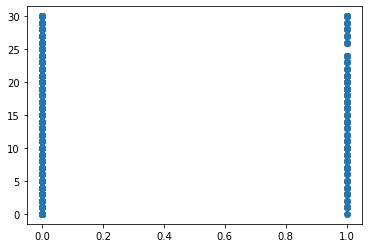

In [16]:
plt.scatter(df['Taxable.Income'],df['Work.Experience'])

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

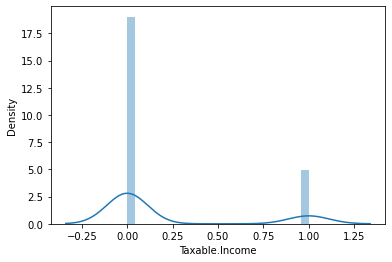

In [17]:
sns.distplot(df['Taxable.Income'])

<AxesSubplot:xlabel='Taxable.Income', ylabel='Work.Experience'>

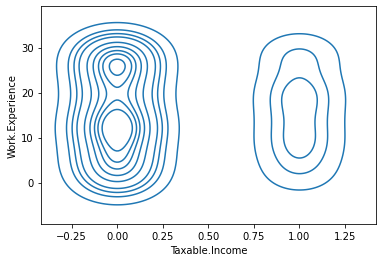

In [18]:
sns.kdeplot(df['Taxable.Income'],df['Work.Experience'])

# Model Building

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [20]:
model=RandomForestClassifier(max_depth=3)

In [21]:
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3)

In [22]:
y_pred=model.predict(xtest)

In [23]:
trainac=model.score(xtrain,ytrain)
testac=model.score(xtest,ytest)

print(f"Training Accuracy {trainac} \nTesting Accuracy {testac}")
print(classification_report(ytest,y_pred))

Training Accuracy 0.7933333333333333 
Testing Accuracy 0.7933333333333333
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150

